#품종 별 개 이미지를 구분하는 딥러닝 모델 제작

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from zipfile import ZipFile

import PIL.Image as pilimg
import keras

## Sample Data 불러오기 (Kaggle Data 활용)

In [2]:
!gdown --id "1ZeFnXMmUtmPPbzQfZ5eB3fi6hvEbbaXm"  # Zip file

Downloading...
From: https://drive.google.com/uc?id=1ZeFnXMmUtmPPbzQfZ5eB3fi6hvEbbaXm
To: /content/dog.zip
724MB [00:07, 92.5MB/s]


In [3]:
now_dir = os.getcwd()
main_dir, file_dir, train_dir, test_dir = now_dir+'/', "dog/", "train/", "test/"

In [4]:
# Extract every file.
zipfile = ZipFile("dog.zip", "r")
zipfile.extractall(main_dir+file_dir)

In [5]:
# Check label data
train_label = pd.read_csv(main_dir+file_dir+'labels.csv')
train_label.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


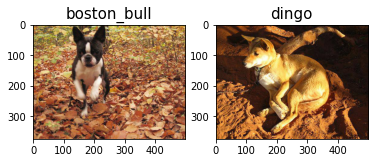

In [6]:
# Check first, second dog's picture & kind.
sample1 = train_label['id'][0]+'.jpg'
sample2 = train_label['id'][1]+'.jpg'
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_title(train_label['breed'][0], size=15)
ax1.imshow((pilimg.open(main_dir+file_dir+train_dir+sample1)))
ax2.set_title(train_label['breed'][1], size=15)
ax2.imshow(np.array(pilimg.open(main_dir+file_dir+train_dir+sample2)))

## 이미지 전처리과정

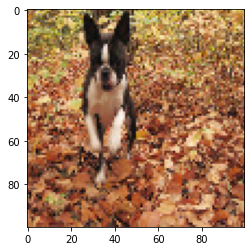

In [7]:
# sample preprocessing
test = np.array(pilimg.open(main_dir+file_dir+train_dir+sample1))
resized = tf.image.resize(test/255.0, [100, 100])
plt.imshow(resized)
plt.show()

In [8]:
# Make img preprocessing function
def preprocess_img(file_dir, file_list):
  size_width, size_height = 100, 100  # 100*100 pict.
  X = np.zeros((len(file_list), size_width, size_height, 3))
  for i, name in enumerate(file_list):
    one_pict = np.array(pilimg.open(file_dir+name+'.jpg'))
    resized_pict = tf.image.resize(one_pict/255.0, [size_width, size_height])
    X[i] = resized_pict
  return X

(6, 100, 100, 3)


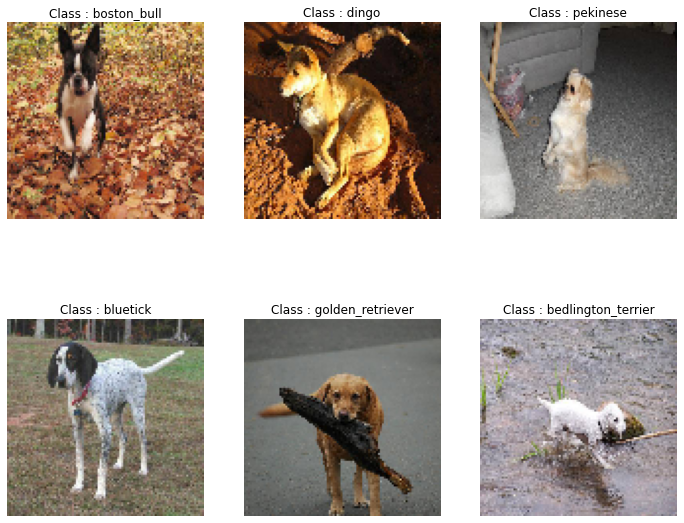

In [9]:
# Sample.
X_sample = preprocess_img(main_dir+file_dir+train_dir, train_label['id'][0:6])
print(X_sample.shape)
plt.figure(figsize=(12, 10))
index = 0
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(X_sample[i])
  plt.title("Class : "+train_label['breed'][i])
  plt.axis("off")
plt.show()

## Data 간단 분석

In [10]:
# check breed's count.
data = train_label['breed'].value_counts()
for k in data.keys():  print(k, '=>', data[k])
# we know that this breed data is inhomogenous.

scottish_deerhound => 126
maltese_dog => 117
afghan_hound => 116
entlebucher => 115
bernese_mountain_dog => 114
shih-tzu => 112
great_pyrenees => 111
pomeranian => 111
basenji => 110
samoyed => 109
airedale => 107
tibetan_terrier => 107
cairn => 106
leonberg => 106
japanese_spaniel => 105
beagle => 105
miniature_pinscher => 102
australian_terrier => 102
blenheim_spaniel => 102
irish_wolfhound => 101
lakeland_terrier => 99
saluki => 99
papillon => 96
whippet => 95
norwegian_elkhound => 95
siberian_husky => 95
pug => 94
chow => 93
italian_greyhound => 92
pembroke => 92
border_terrier => 91
newfoundland => 91
ibizan_hound => 91
silky_terrier => 90
lhasa => 90
bedlington_terrier => 89
dandie_dinmont => 89
irish_setter => 88
rhodesian_ridgeback => 88
sealyham_terrier => 88
old_english_sheepdog => 87
boston_bull => 87
collie => 87
english_foxhound => 86
schipperke => 86
bouvier_des_flandres => 86
african_hunting_dog => 86
kelpie => 86
weimaraner => 85
bloodhound => 85
bluetick => 85
saint_be

## 전체 Data 정리.

In [11]:
# preprocessing for all data. It takes long time.
X_train = preprocess_img(main_dir+file_dir+train_dir, train_label['id'])
print(X_train.shape)

(10222, 100, 100, 3)


In [12]:
cls = train_label['breed'].value_counts()
key_data = list(cls.keys())
print(key_data[0:5])

['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher', 'bernese_mountain_dog']


In [13]:
y_train = train_label['breed'].copy()
for i, k in enumerate(key_data):
  y_train[y_train == k] = i
print(train_label['breed'][0], key_data[y_train[0]])
print(y_train.head())
y_train = y_train.astype(float)

boston_bull boston_bull
0     41
1     72
2     91
3     50
4    117
Name: breed, dtype: object


In [14]:
print(y_train.shape)
print(len(key_data))

(10222,)
120


## 레이어 적층

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100, 100, 3), kernel_size=(3, 3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32), 
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(units=250, activation='relu'),
    tf.keras.layers.Dense(units=120, activation='softmax')])

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 565504)            0         
_________________________________________________________________
dense (Dense)                (None, 120)               67860600  
Total params: 67,884,184
Trainable params: 67,884,184
Non-trainable params: 0
_________________________________________________________________


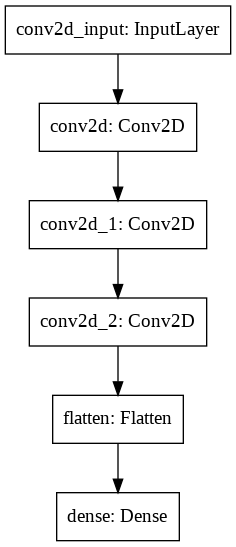

In [16]:
keras.utils.plot_model(model)

## 학습 및 평가

In [17]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

#history = model.fit(X_train, y_train, epochs=15, validation_split=0.2, callbacks=[early_stopping_cb])
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
256/256 [==============================] - 48s 59ms/step - loss: 24.4479 - accuracy: 0.0170 - val_loss: 5.0369 - val_accuracy: 0.0323
Epoch 2/10
256/256 [==============================] - 14s 55ms/step - loss: 0.3313 - accuracy: 0.9470 - val_loss: 10.3464 - val_accuracy: 0.0205
Epoch 3/10
256/256 [==============================] - 14s 56ms/step - loss: 0.0823 - accuracy: 0.9958 - val_loss: 11.2379 - val_accuracy: 0.0196
Epoch 4/10
256/256 [==============================] - 14s 56ms/step - loss: 0.0475 - accuracy: 0.9965 - val_loss: 10.9026 - val_accuracy: 0.0176
Epoch 5/10
256/256 [==============================] - 14s 56ms/step - loss: 0.0504 - accuracy: 0.9950 - val_loss: 10.9015 - val_accuracy: 0.0200
Epoch 6/10
256/256 [==============================] - 14s 56ms/step - loss: 0.0399 - accuracy: 0.9961 - val_loss: 9.2629 - val_accuracy: 0.0230
Epoch 7/10
256/256 [==============================] - 14s 55ms/step - loss: 0.0243 - accuracy: 0.9981 - val_loss: 8.7470 - val_accu

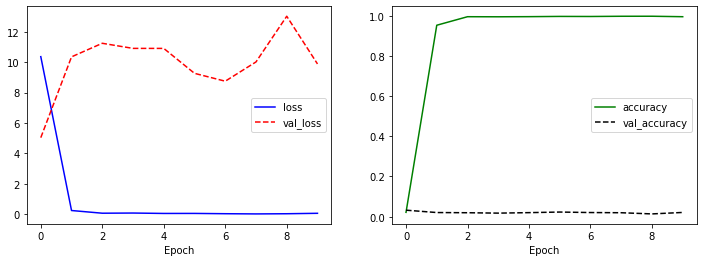

In [18]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
#plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [22]:
pred = model.evaluate(X_train, y_train)
print(pred)
print(f'predict rate : {pred[1]*100}%')

320/320 [==============================] - 4s 11ms/step - loss: 1.9858 - accuracy: 0.8038
[1.9858330488204956, 0.803756594657898]
predict rate : 80.3756594657898%


In [20]:
print(X_train[0].shape)
samp = X_train[0].reshape(-1, 100, 100, 3)
n = np.argmax(model.predict(samp), axis=-1)[0]
print('predicted =>', n, '=', key_data[n])
print('real =>', train_label['breed'][0])
# for one data.

(100, 100, 3)
predicted => 41 = boston_bull
real => boston_bull


## 학습모델 저장

In [23]:
model.save('dog_clsf_model.h5')